In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv("diabetes.csv")

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
data.dropna

<bound method DataFrame.dropna of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

In [13]:
correlation_matrix = data.corr()
print(correlation_matrix)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

In [15]:
correlation_matrix = data.corr()

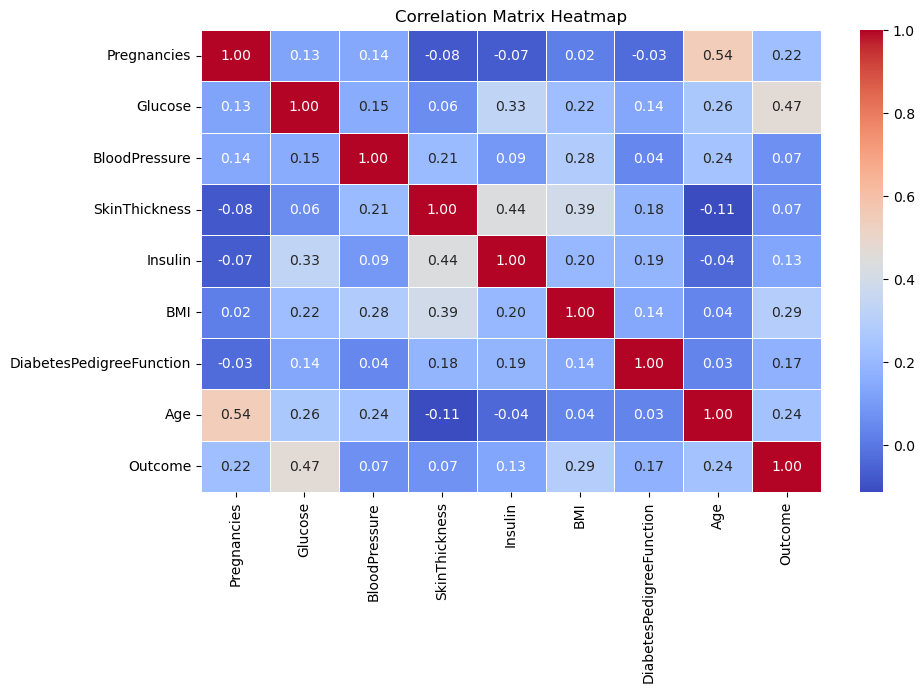

In [17]:
plt.figure(figsize=(10,6))  # Adjust figure size
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [19]:
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]


In [21]:
# Remove outliers
data_cleaned = remove_outliers_iqr(data)

Text(0.5, 1.0, 'Before Removing Outliers')

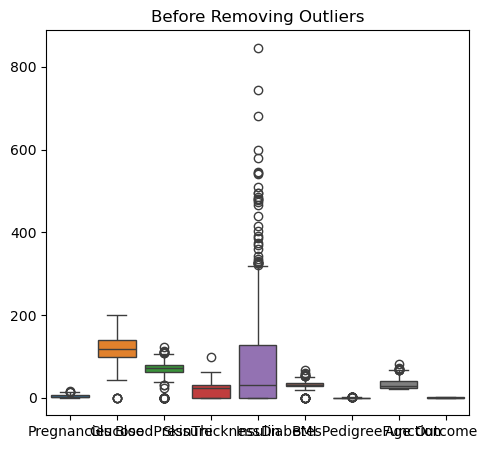

In [25]:
# Boxplot before removing outliers
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=data)
plt.title("Before Removing Outliers")

NameError: name 'df_cleaned' is not defined

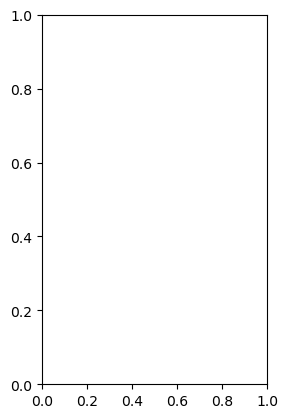

In [27]:
# Boxplot after removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(data=df_cleaned)
plt.title("After Removing Outliers")

plt.tight_layout()
plt.show()


In [29]:
# Calculate Mean, Median, and Mode
mean_values = data.mean()
median_values = data.median()
mode_values = data.mode().iloc[0]  # Take the first row since mode() returns multiple modes if they exist

# Display the results
print("Mean Values:\n", mean_values, "\n")
print("Median Values:\n", median_values, "\n")
print("Mode Values:\n", mode_values, "\n")

Mean Values:
 Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64 

Median Values:
 Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64 

Mode Values:
 Pregnancies                  1.000
Glucose                     99.000
BloodPressure               70.000
SkinThickness                0.000
Insulin                      0.000
BMI                         32.000
DiabetesPedigreeFunction    

<Axes: xlabel='Pregnancies', ylabel='Outcome'>

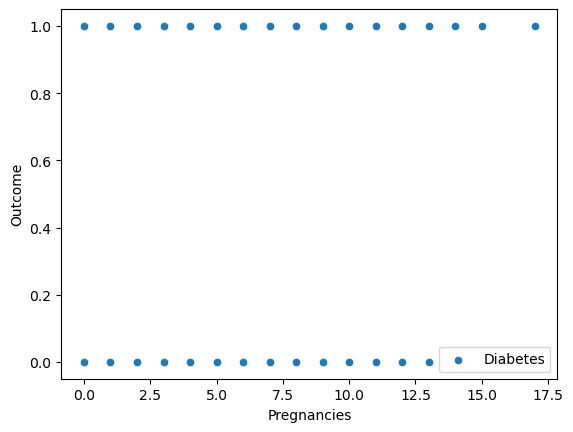

In [31]:
sns.scatterplot(x = data['Pregnancies'],y = data ['Outcome'], label="Diabetes")

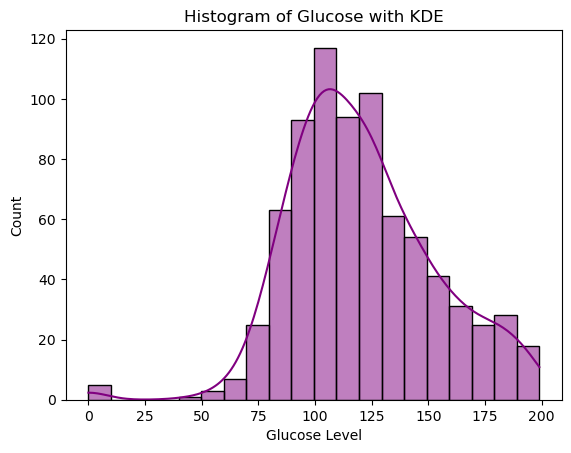

In [35]:
sns.histplot(data['Glucose'], bins=20, kde=True, color='purple')
plt.title('Histogram of Glucose with KDE')
plt.xlabel('Glucose Level')
plt.ylabel('Count')
plt.show()

In [37]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scale=scaler.fit_transform(X)

# Split into 80% training and 20% test data
X_train, X_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.2, random_state=42)


In [39]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
model = Perceptron(max_iter=1000, eta0=0.1, random_state=42) #eta0=learning rate
model.fit(X_train, y_train)

Perceptron(eta0=0.1, random_state=42)

In [41]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.512987012987013
Confusion Matrix:
 [[53 46]
 [29 26]]


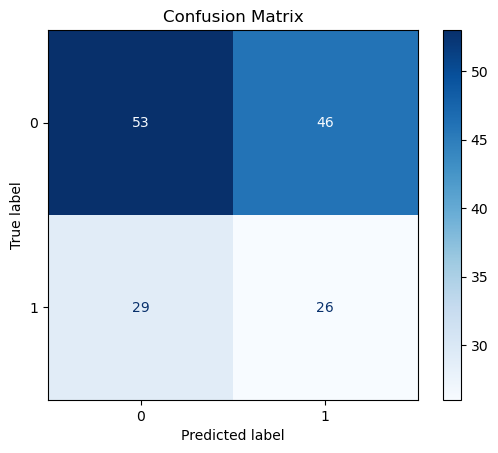

In [43]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")  # You can choose other colormaps too
plt.title("Confusion Matrix")
plt.show()

In [45]:
model = Perceptron(max_iter=2000, eta0=0.1, random_state=42) #eta0=learning rate
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.512987012987013
Confusion Matrix:
 [[53 46]
 [29 26]]


In [47]:
model = Perceptron(max_iter=3000, eta0=0.1, random_state=42) #eta0=learning rate
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.512987012987013
Confusion Matrix:
 [[53 46]
 [29 26]]


In [49]:
model = Perceptron(max_iter=4000, eta0=0.1, random_state=42) #eta0=learning rate
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.512987012987013
Confusion Matrix:
 [[53 46]
 [29 26]]


In [51]:
model = Perceptron(max_iter=5000, eta0=0.1, random_state=42) #eta0=learning rate
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.512987012987013
Confusion Matrix:
 [[53 46]
 [29 26]]


In [53]:
model = Perceptron(max_iter=1000, eta0=0.2, random_state=42) #eta0=learning rate
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.512987012987013
Confusion Matrix:
 [[53 46]
 [29 26]]
